In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ModuleNotFoundError: No module named 'sklearn.neighbors.base'

In [313]:
data = pd.read_csv(r"bank_data_abb.csv")
data.head()

,CIF_Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag
0,1,1347,28,single,rented,no,Mechanical_engineer,Sumgait,Tamkart taksit,3500,3,0
1,2,2697,39,single,rented,no,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,9000,9,0
2,3,2939,55,married,rented,no,Technical_writer,Ganca,Tamkart taksit,10000,4,0
3,4,4648,48,single,rented,yes,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,5000,2,1
4,5,3063,46,single,rented,no,Civil_servant,Sumgait,Gundelik Telebat Krediti,9000,3,1


In [314]:
data.describe(include='all')

,CIF_Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag
count,252000.000000,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,2,3,2,51,4,2,NaN,NaN,NaN
top,NaN,NaN,NaN,single,rented,no,Physician,Sumgait,Tamkart taksit,NaN,NaN,NaN
freq,NaN,NaN,NaN,226272,231898,176000,5957,63055,126182,NaN,NaN,NaN
mean,126000.500000,2749.773675,36.493298,NaN,NaN,NaN,NaN,NaN,NaN,5740.460317,6.333877,0.123000
std,72746.278255,1298.964304,10.962989,NaN,NaN,NaN,NaN,NaN,NaN,2428.836326,3.647053,0.328438
min,1.000000,500.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,0.000000,0.000000
25%,63000.750000,1623.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,3500.000000,3.000000,0.000000
50%,126000.500000,2751.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,5500.000000,6.000000,0.000000
75%,189000.250000,3874.000000,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000,9.000000,0.000000


In [315]:
data.dtypes

CIF_Id              int64
Income              int64
Age                 int64
Married/Single     object
House_Ownership    object
Car_Ownership      object
Profession         object
City               object
Product            object
Amount              int64
Overdue_days        int64
Default_Flag        int64
dtype: object

In [316]:
data = data.drop(data[['CIF_Id']],axis=1)

In [317]:
data.shape

(252000, 11)

In [318]:
data.isnull().sum()

Income             0
Age                0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
City               0
Product            0
Amount             0
Overdue_days       0
Default_Flag       0
dtype: int64

In [319]:
data['Married/Single'] = data['Married/Single'].map({'single': 0, 'married': 1})

In [320]:
data.House_Ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [321]:
# woe esase imbalansda istifade edirik, cunki lazim olan ve ya olmayan melumatlari silmek istemirik. 
# Defaultlari mueyyen etmek ucun istifade olunur woe
woe_df = data.groupby('House_Ownership')['Default_Flag'].mean()

In [322]:
woe_df = pd.DataFrame(woe_df)
woe_df

,Default_Flag
House_Ownership,
norent_noown,0.099527
owned,0.089797
rented,0.125577


In [323]:
woe_df['good'] = woe_df['Default_Flag'] 
woe_df['bad'] = 1 - woe_df['good']
woe_df

,Default_Flag,good,bad
House_Ownership,,,
norent_noown,0.099527,0.099527,0.900473
owned,0.089797,0.089797,0.910203
rented,0.125577,0.125577,0.874423


In [324]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])

In [325]:
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,Default_Flag,good,bad,WOE
House_Ownership,,,,
norent_noown,0.099527,0.099527,0.900473,-2.202494
owned,0.089797,0.089797,0.910203,-2.316114
rented,0.125577,0.125577,0.874423,-1.940647


In [326]:
data.loc[:,'House_Ownership_woe'] = data['House_Ownership'].map(woe_df['WOE'])

In [327]:
data

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag,House_Ownership_woe
0,1347,28,0,rented,no,Mechanical_engineer,Sumgait,Tamkart taksit,3500,3,0,-1.940647
1,2697,39,0,rented,no,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,9000,9,0,-1.940647
2,2939,55,1,rented,no,Technical_writer,Ganca,Tamkart taksit,10000,4,0,-1.940647
3,4648,48,0,rented,yes,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,5000,2,1,-1.940647
4,3063,46,0,rented,no,Civil_servant,Sumgait,Gundelik Telebat Krediti,9000,3,1,-1.940647
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,2176,25,0,rented,no,Surgeon,Ganca,Tamkart taksit,3500,6,0,-1.940647
251996,544,26,0,rented,no,Army_officer,Ganca,Gundelik Telebat Krediti,7500,6,0,-1.940647
251997,4769,34,0,rented,no,Design_Engineer,Ganca,Gundelik Telebat Krediti,8500,7,0,-1.940647
251998,1359,47,0,rented,no,Graphic_Designer,Ganca,Tamkart taksit,7000,0,0,-1.940647


In [328]:
data['Income'].describe()

count    252000.000000
mean       2749.773675
std        1298.964304
min         500.000000
25%        1623.000000
50%        2751.000000
75%        3874.000000
max        5000.000000
Name: Income, dtype: float64

In [329]:
data['Income'].quantile(0.25)
data['Income'].min()

500

In [330]:
ranges = [400, data['Income'].quantile(0.25), data['Income'].quantile(0.5), data['Income'].quantile(0.75), np.inf]  # np.inf for infinity
labels_added = ['Q1', 'Q2', 'Q3', 'Q4']
data['income_buckets'] = pd.cut(data['Income'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(15)

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag,House_Ownership_woe,income_buckets
0,1347,28,0,rented,no,Mechanical_engineer,Sumgait,Tamkart taksit,3500,3,0,-1.940647,Q1
1,2697,39,0,rented,no,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,9000,9,0,-1.940647,Q2
2,2939,55,1,rented,no,Technical_writer,Ganca,Tamkart taksit,10000,4,0,-1.940647,Q3
3,4648,48,0,rented,yes,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,5000,2,1,-1.940647,Q4
4,3063,46,0,rented,no,Civil_servant,Sumgait,Gundelik Telebat Krediti,9000,3,1,-1.940647,Q3
5,2042,43,0,rented,no,Civil_servant,Ganca,Tamkart taksit,4000,0,0,-1.940647,Q2
6,4592,23,1,rented,no,Librarian,Baku,Gundelik Telebat Krediti,3500,8,0,-1.940647,Q4
7,1076,19,0,rented,no,Economist,Ganca,Gundelik Telebat Krediti,10000,2,0,-1.940647,Q1
8,3427,35,0,rented,yes,Flight_attendant,Sumgait,Tamkart taksit,4500,11,0,-1.940647,Q3
9,1388,29,0,rented,no,Architect,Ganca,Gundelik Telebat Krediti,7500,5,0,-1.940647,Q1


In [331]:
woe_df1 = data.groupby('income_buckets')['Default_Flag'].mean()

woe_df1 = pd.DataFrame(woe_df1)
woe_df1

,Default_Flag
income_buckets,
Q1,0.123846
Q2,0.121430
Q3,0.122256
Q4,0.124470


In [332]:
woe_df1['good'] = woe_df1['Default_Flag'] 
woe_df1['bad'] = 1 - woe_df1['good']
woe_df1

,Default_Flag,good,bad
income_buckets,,,
Q1,0.123846,0.123846,0.876154
Q2,0.121430,0.121430,0.878570
Q3,0.122256,0.122256,0.877744
Q4,0.124470,0.124470,0.875530


In [333]:
woe_df1['bad'] = np.where(woe_df1['bad']==0,0.00001,woe_df1['bad'])

In [334]:
woe_df1['WOE'] = np.log(woe_df1['good']/woe_df1['bad'])

woe_df1

,Default_Flag,good,bad,WOE
income_buckets,,,,
Q1,0.123846,0.123846,0.876154,-1.956506
Q2,0.121430,0.121430,0.878570,-1.978958
Q3,0.122256,0.122256,0.877744,-1.971235
Q4,0.124470,0.124470,0.875530,-1.950767


In [335]:
data.loc[:,'income_buckets_woe'] = data['income_buckets'].map(woe_df1['WOE'])

In [336]:
data

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag,House_Ownership_woe,income_buckets,income_buckets_woe
0,1347,28,0,rented,no,Mechanical_engineer,Sumgait,Tamkart taksit,3500,3,0,-1.940647,Q1,-1.956506
1,2697,39,0,rented,no,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,9000,9,0,-1.940647,Q2,-1.978958
2,2939,55,1,rented,no,Technical_writer,Ganca,Tamkart taksit,10000,4,0,-1.940647,Q3,-1.971235
3,4648,48,0,rented,yes,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,5000,2,1,-1.940647,Q4,-1.950767
4,3063,46,0,rented,no,Civil_servant,Sumgait,Gundelik Telebat Krediti,9000,3,1,-1.940647,Q3,-1.971235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,2176,25,0,rented,no,Surgeon,Ganca,Tamkart taksit,3500,6,0,-1.940647,Q2,-1.978958
251996,544,26,0,rented,no,Army_officer,Ganca,Gundelik Telebat Krediti,7500,6,0,-1.940647,Q1,-1.956506
251997,4769,34,0,rented,no,Design_Engineer,Ganca,Gundelik Telebat Krediti,8500,7,0,-1.940647,Q4,-1.950767
251998,1359,47,0,rented,no,Graphic_Designer,Ganca,Tamkart taksit,7000,0,0,-1.940647,Q1,-1.956506


In [337]:
data.Default_Flag.value_counts()
# gorunduyu kimi imbalansdi, yeni 0 coxdu 1 den

0    221004
1     30996
Name: Default_Flag, dtype: int64

In [338]:
x1 = data[['income_buckets_woe','House_Ownership_woe','Overdue_days','Married/Single']]
y = data['Default_Flag']

In [346]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [340]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [341]:
y_pred = reg.predict(X_test)

In [343]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[66329,     0],
       [ 9271,     0]])

In [344]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### When the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.


- weight = n_samples_overall / (n_classes * n_samples_of_class)

Overall sample is: 252000

From our model there are 2 classes:

- 0 is   221004
- 1  is   30996

weight for 0 is:

- weight_0 = 252000 / 2 * 221004

weight for 1 is:

- weight_1 = 252000 / 2 * 30996

### We don’t use the mean squared error as the cost function for the logistic regression because instead of fitting a straight line, we use the sigmoid curve as the prediction function.

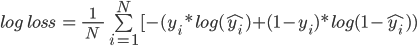

### after balancing data with weights

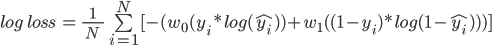

In [364]:
reg = LogisticRegression(class_weight='balanced')
reg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

In [365]:
y_pred = reg.predict(X_test)

In [366]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [367]:
confusion_matrix

array([[24013, 42316],
       [ 3043,  6228]])

In [368]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.36      0.51     66329
           1       0.13      0.67      0.22      9271

    accuracy                           0.40     75600
   macro avg       0.51      0.52      0.36     75600
weighted avg       0.79      0.40      0.48     75600



In [308]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_pred,y_test)*100)

AUC Score: 51.64570262325394


In [ ]:
# gini hesablama ucun = 51.65*2-1
gini= roc_auc_score(y_pred,y_test)*100)*2-1

In [250]:
#over and under sampler

over = RandomOverSampler(sampling_strategy=0.5)
# This means that if the majority class had 1,000 examples and the minority class had 100, 
# the transformed dataset would have 500 examples of the minority class.
# We can use sampling_strategy='minority',
# this strategy would oversampling the minority class so that it has 1,000 examples.

under = RandomUnderSampler(sampling_strategy=0.8)

In [251]:
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({0: 154675, 1: 77337})


In [252]:
# now to combine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")


Combined Random Sampling: Counter({0: 96671, 1: 77337})


In [253]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_combined_sampling, y_combined_sampling, test_size = 0.2)


In [303]:
reg = LogisticRegression()
reg.fit(X2_train, y2_train)

LogisticRegression(class_weight='balanced')

In [304]:
y2_pred = reg.predict(X2_test)

In [305]:
confusion_matrix = metrics.confusion_matrix(y2_test, y2_pred)

In [306]:
confusion_matrix

array([[ 6906, 12554],
       [ 4763, 10579]])

In [307]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.59      0.35      0.44     19460
           1       0.46      0.69      0.55     15342

    accuracy                           0.50     34802
   macro avg       0.52      0.52      0.50     34802
weighted avg       0.53      0.50      0.49     34802



In [309]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y2_test, y2_pred)*100)

AUC Score: 52.22134242993894


In [310]:
Gini = (roc_auc_score(y2_test, y2_pred)*2)-1

In [311]:
Gini

0.04442684859877888